In [1]:
import torch

In [116]:
# generate a set of samples for xor problem
# the xor problem is a binary classification problem
# the input is a 2D vector, and the output is a scalar
# the input is a set of 1000 samples, each sample is a 2D vector, the value of x1 and x2 is randomly selected from 0 to 2
# the output is 1 if x1 and x2 are both less than 1 or both greater than 1, otherwise the output is 0
# the output is a set of 100 scalars, each scalar is 0 or 1
def generate_samples():
    x = torch.rand(1000, 2) * 2
    y = torch.zeros(1000)
    
    # moving x1 from 0.8 to 1 to 0.0 to 0.2, moving x2 from 0.8 to 1 to 0.0 to 0.2
    # moving x1 from 1.0 to 1.2 to 1.8 to 2.0, moving x2 from 1.0 to 1.2 to 1.8 to 2.0
    
    for i in range(1000):
        if (x[i][0] > 0.8 and x[i][0] < 1.0):
            x[i][0] = x[i][0] - 0.8
        elif (x[i][0] >= 1.0 and x[i][0] < 1.2):
            x[i][0] = x[i][0] + 0.8
            
        if (x[i][1] > 0.8 and x[i][1] < 1.0):
            x[i][1] = x[i][1] - 0.8
        elif (x[i][1] >= 1.0 and x[i][1] < 1.2):
            x[i][1] = x[i][1] + 0.8
    
    for i in range(1000):
        if (x[i][0] < 1 and x[i][1] < 1) or (x[i][0] > 1 and x[i][1] > 1):
            y[i] = 1
    return x, y



In [117]:
# generate the training set

x, y = generate_samples()

# in order to display different group of samples, add additional label for each sample, the label is from 0 to 3, both less than 1, both greater than 1, one less than 1 and the other greater than 1, one greater than 1 and the other less than 1

label = torch.zeros(1000)

for i in range(1000):
    if x[i][0] < 1 and x[i][1] < 1:
        label[i] = 0
    elif x[i][0] > 1 and x[i][1] > 1:
        label[i] = 1
    elif x[i][0] < 1 and x[i][1] > 1:
        label[i] = 2
    else:
        label[i] = 3

In [118]:
label

tensor([0., 2., 1., 0., 3., 3., 3., 2., 1., 3., 3., 3., 2., 2., 3., 3., 2., 0.,
        1., 3., 2., 2., 3., 3., 2., 3., 2., 0., 2., 2., 0., 0., 3., 0., 1., 0.,
        2., 2., 2., 1., 0., 0., 1., 0., 3., 0., 0., 3., 1., 2., 1., 1., 0., 1.,
        0., 2., 2., 0., 2., 1., 0., 3., 0., 0., 1., 0., 0., 0., 1., 1., 0., 3.,
        0., 2., 0., 2., 3., 1., 2., 0., 3., 1., 1., 3., 3., 2., 2., 3., 3., 1.,
        3., 2., 0., 2., 0., 2., 3., 1., 2., 3., 0., 1., 2., 1., 0., 0., 3., 0.,
        1., 1., 2., 1., 3., 2., 1., 2., 2., 2., 2., 0., 1., 2., 0., 2., 1., 3.,
        0., 2., 1., 3., 3., 2., 3., 2., 1., 3., 1., 0., 3., 1., 3., 0., 0., 3.,
        3., 3., 3., 2., 3., 0., 0., 3., 2., 3., 0., 0., 1., 1., 1., 3., 2., 1.,
        2., 3., 2., 0., 2., 0., 0., 0., 3., 0., 3., 0., 1., 0., 0., 1., 2., 0.,
        1., 1., 1., 0., 1., 0., 1., 3., 0., 0., 0., 3., 3., 2., 2., 0., 3., 2.,
        1., 1., 1., 1., 2., 2., 0., 0., 2., 1., 2., 3., 1., 1., 3., 1., 2., 0.,
        1., 2., 2., 0., 2., 0., 3., 2., 

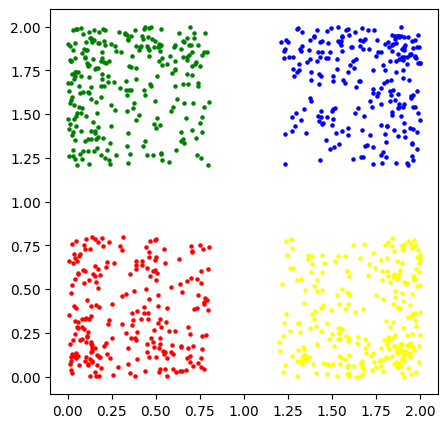

In [119]:

# plot the x y of the samples, use different color for different group of samples

import matplotlib.pyplot as plt

# set the figure size to 10

plt.figure(figsize=(5, 5))

# set the dot size to 5

plt.scatter(x[label == 0, 0], x[label == 0, 1], color='red', s=5)
plt.scatter(x[label == 1, 0], x[label == 1, 1], color='blue', s=5)
plt.scatter(x[label == 2, 0], x[label == 2, 1], color='green', s=5)
plt.scatter(x[label == 3, 0], x[label == 3, 1], color='yellow', s=5)
plt.show()


In [120]:
number_of_hidden_units = 8

In [121]:
# define a torch neural network model for the xor problem

class Net(torch.nn.Module):
    def __init__(self, first_layer_size, second_layer_size):
        super(Net, self).__init__()
        self.fc1 = torch.nn.Linear(2, first_layer_size)
        self.fc2 = torch.nn.Linear(first_layer_size, second_layer_size)
        self.fc3 = torch.nn.Linear(second_layer_size, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.sigmoid(self.fc3(x))
        return x

In [127]:
# train the model

for try_time in range(10):
    print('try time: {}'.format(try_time))
    for first_layer_size in range(6, 7):
        for second_layer_size in range(6, 7):
            model = Net(first_layer_size, second_layer_size)
            criterion = torch.nn.BCELoss()
            optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

            print('first layer size: {}, second layer size: {}'.format(first_layer_size, second_layer_size))
            print('------------------------------------------------------------')
            print('------------------------------------------------------------')
            
            for epoch in range(10000):
                optimizer.zero_grad()
                output = model(x)
                loss = criterion(output, y.view(-1, 1))
                loss.backward()
                optimizer.step()
                if epoch % 1000 == 0:
                    print('first layer size: {}, second layer size: {}, epoch: {}, loss: {}'.format(first_layer_size, second_layer_size, epoch, loss.item()))

            print('------------------------------------------------------------')
        

# model = Net(1,2)
# criterion = torch.nn.BCELoss()
# optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# for epoch in range(10000):
#     optimizer.zero_grad()
#     output = model(x)
#     loss = criterion(output, y.view(-1, 1))
#     loss.backward()
#     optimizer.step()
#     if epoch % 1000 == 0:
#         print('epoch: {}, loss: {}'.format(epoch, loss.item()))

try time: 0
first layer size: 6, second layer size: 6
------------------------------------------------------------
------------------------------------------------------------
first layer size: 6, second layer size: 6, epoch: 0, loss: 0.6988348960876465
first layer size: 6, second layer size: 6, epoch: 1000, loss: 0.07025712728500366
first layer size: 6, second layer size: 6, epoch: 2000, loss: 0.06956928968429565
first layer size: 6, second layer size: 6, epoch: 3000, loss: 0.06956327706575394
first layer size: 6, second layer size: 6, epoch: 4000, loss: 0.06956156343221664
first layer size: 6, second layer size: 6, epoch: 5000, loss: 0.06956291198730469
first layer size: 6, second layer size: 6, epoch: 6000, loss: 0.06956259161233902
first layer size: 6, second layer size: 6, epoch: 7000, loss: 0.06956228613853455
first layer size: 6, second layer size: 6, epoch: 8000, loss: 0.0695621445775032
first layer size: 6, second layer size: 6, epoch: 9000, loss: 0.06956557929515839
---------

In [82]:
# wrap above code into a function

def plot_neuron(x, label, weight, bias, neuron_index=0):
    
    weight_length = torch.sqrt(torch.sum(weight * weight, dim=1))
    weight_sin = weight[:, 1] / weight_length
    weight_cos = weight[:, 0] / weight_length
    negative_bias = -bias
    bias_x = negative_bias * weight_cos
    bias_y = negative_bias * weight_sin

    plt.figure(figsize=(5, 5))
    
    # setting the max x and y to 2.5
    plt.xlim(0, 2.5)
    plt.ylim(0, 2.5)
    # setting the min x and y to -2.5
    plt.xlim(-2.5, 2.5)
    plt.ylim(-2.5, 2.5)
    
    plt.scatter(x[label == 0, 0], x[label == 0, 1], color='red', s=5)
    plt.scatter(x[label == 1, 0], x[label == 1, 1], color='blue', s=5)
    plt.scatter(x[label == 2, 0], x[label == 2, 1], color='green', s=5)
    plt.scatter(x[label == 3, 0], x[label == 3, 1], color='yellow', s=5)
    plt.plot([bias_x[neuron_index].item(), weight[neuron_index][0].item()], [bias_y[neuron_index].item(), weight[neuron_index][1].item()], color='black')
    plt.scatter(bias_x[neuron_index].item(), bias_y[neuron_index].item(), color='black', s=50)
    plt.plot([bias_x[neuron_index].item() - weight[neuron_index][1].item(), bias_x[neuron_index].item() + weight[neuron_index][1].item()], [bias_y[neuron_index].item() + weight[neuron_index][0].item(), bias_y[neuron_index].item() - weight[neuron_index][0].item()], color='orange')
    
    plt.show()

In [51]:
# node_number = 6

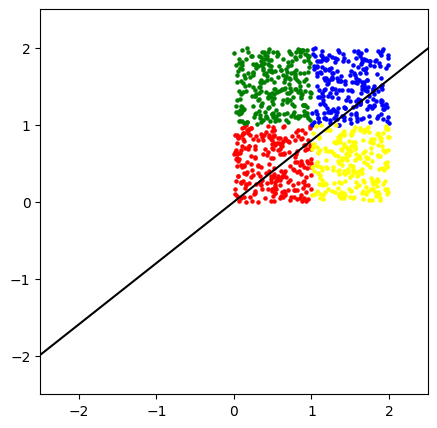

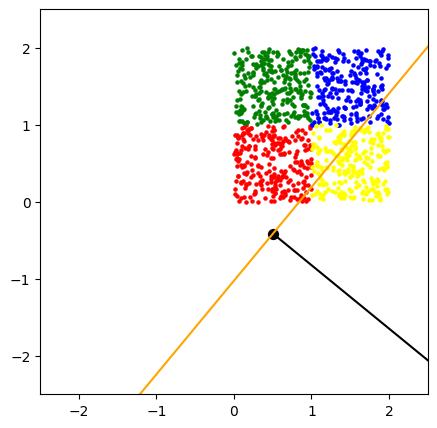

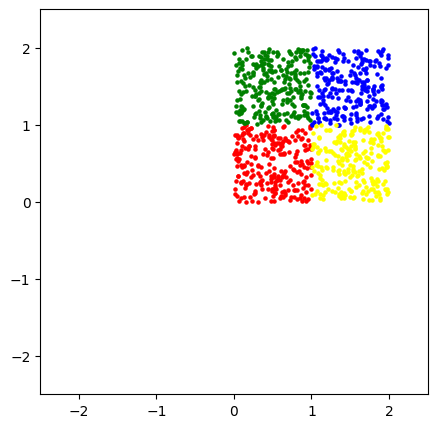

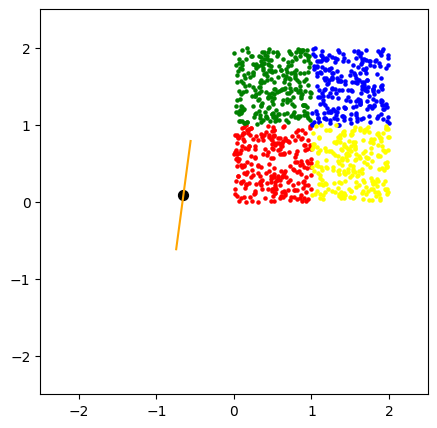

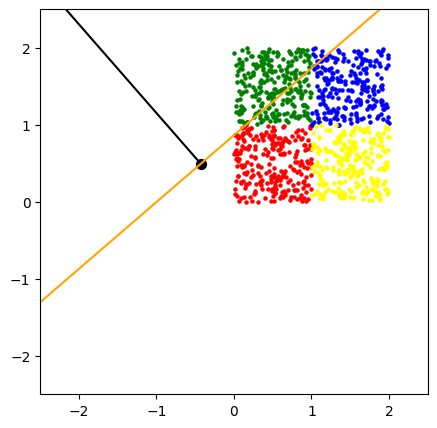

In [83]:
weight, bias = model.fc1.parameters()

for i in range(number_of_hidden_units):
    plot_neuron(x, label, weight, bias, i)

In [84]:
# neuron_index = 0
# relu_output = torch.relu(torch.mm(x, weight.t()) + bias)
    
# relu_output_x = relu_output[:, neuron_index]

In [85]:
# relu_output_x

In [86]:
# plotting the output of Relu(fc1) for each neuron

def plot_neuron(x, label, weight, bias, first_neuron_index=0, second_neuron_index=1):
    
    relu_output = torch.relu(torch.mm(x, weight.t()) + bias).detach().numpy()
    
    relu_output_x = relu_output[:, neuron_index]
    relu_output_y = relu_output[:, second_neuron_index]

    plt.figure(figsize=(15, 15))
    
    # setting the max x and y to 2.5
    # plt.xlim(0, 2.5)
    # plt.ylim(0, 2.5)
    # # setting the min x and y to -2.5
    # plt.xlim(-2.5, 2.5)
    # plt.ylim(-2.5, 2.5)
    
    # scatter plot the samples, setting all y to 0
    # setting the color based on the label
    
    plt.scatter(relu_output_x[label == 0], relu_output_y[label == 0], color='red', s=5)
    plt.scatter(relu_output_x[label == 1], relu_output_y[label == 1], color='blue', s=5)
    plt.scatter(relu_output_x[label == 2], relu_output_y[label == 2], color='green', s=5)
    plt.scatter(relu_output_x[label == 3], relu_output_y[label == 3], color='yellow', s=5)
    
    
    
    
    
    plt.show()

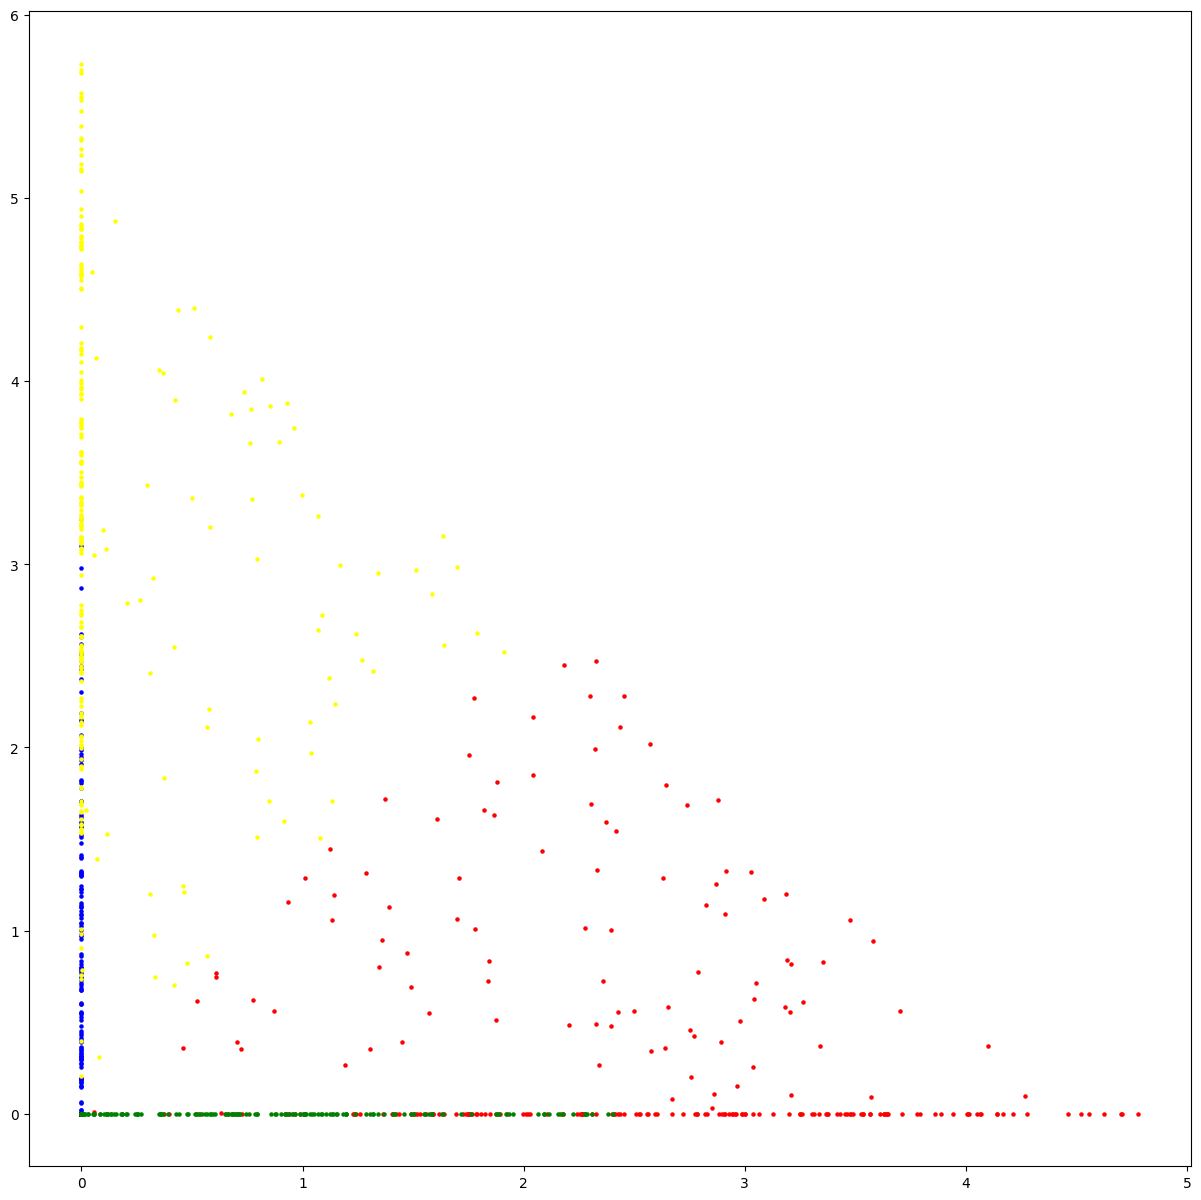

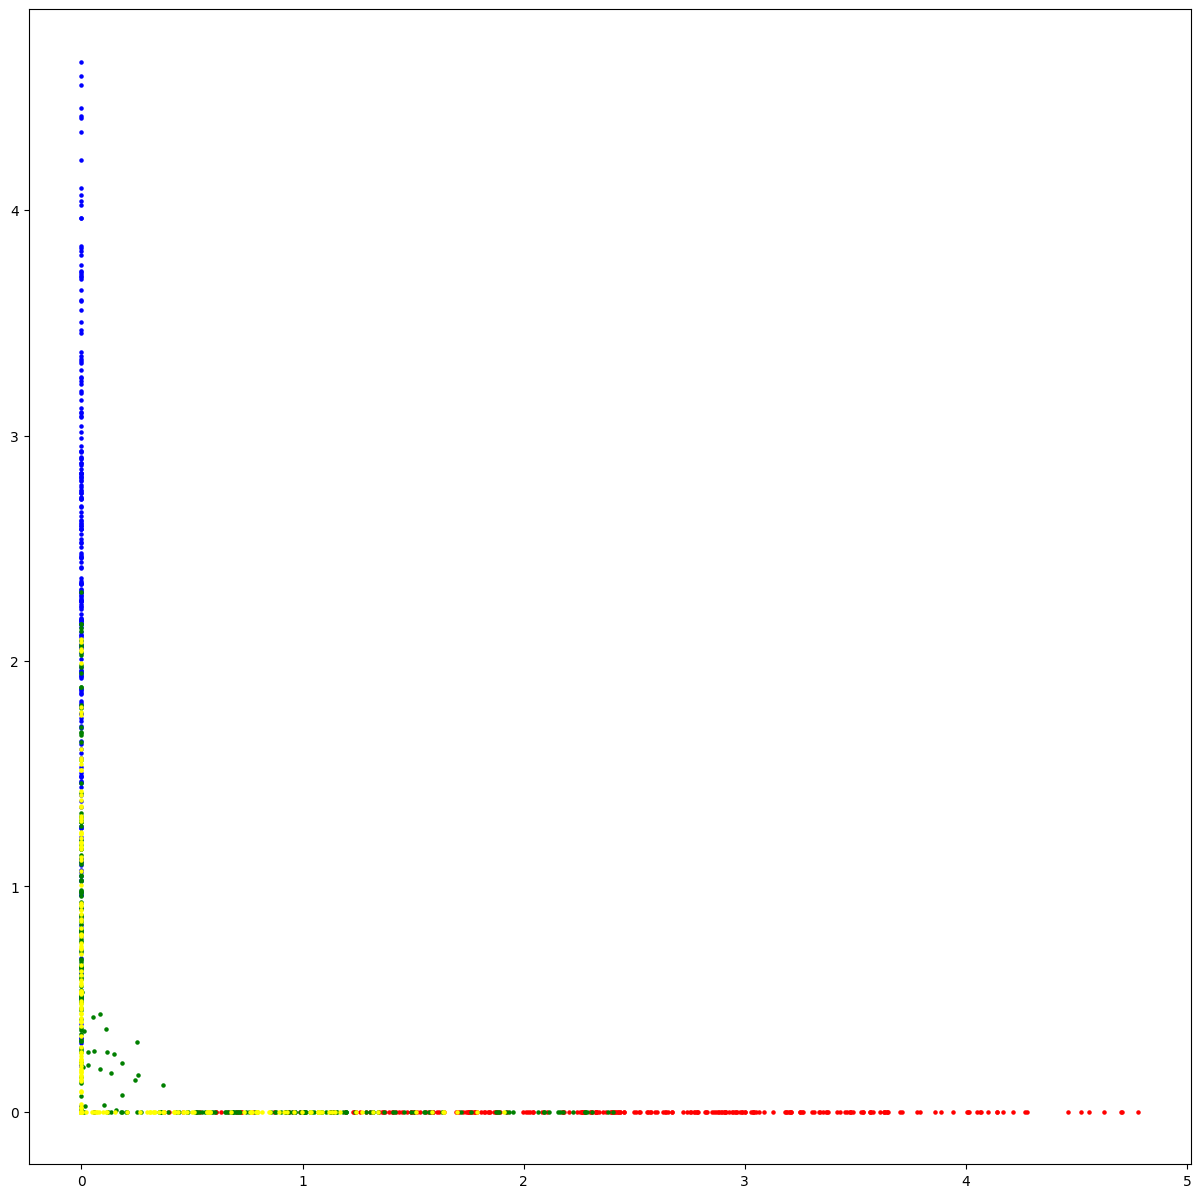

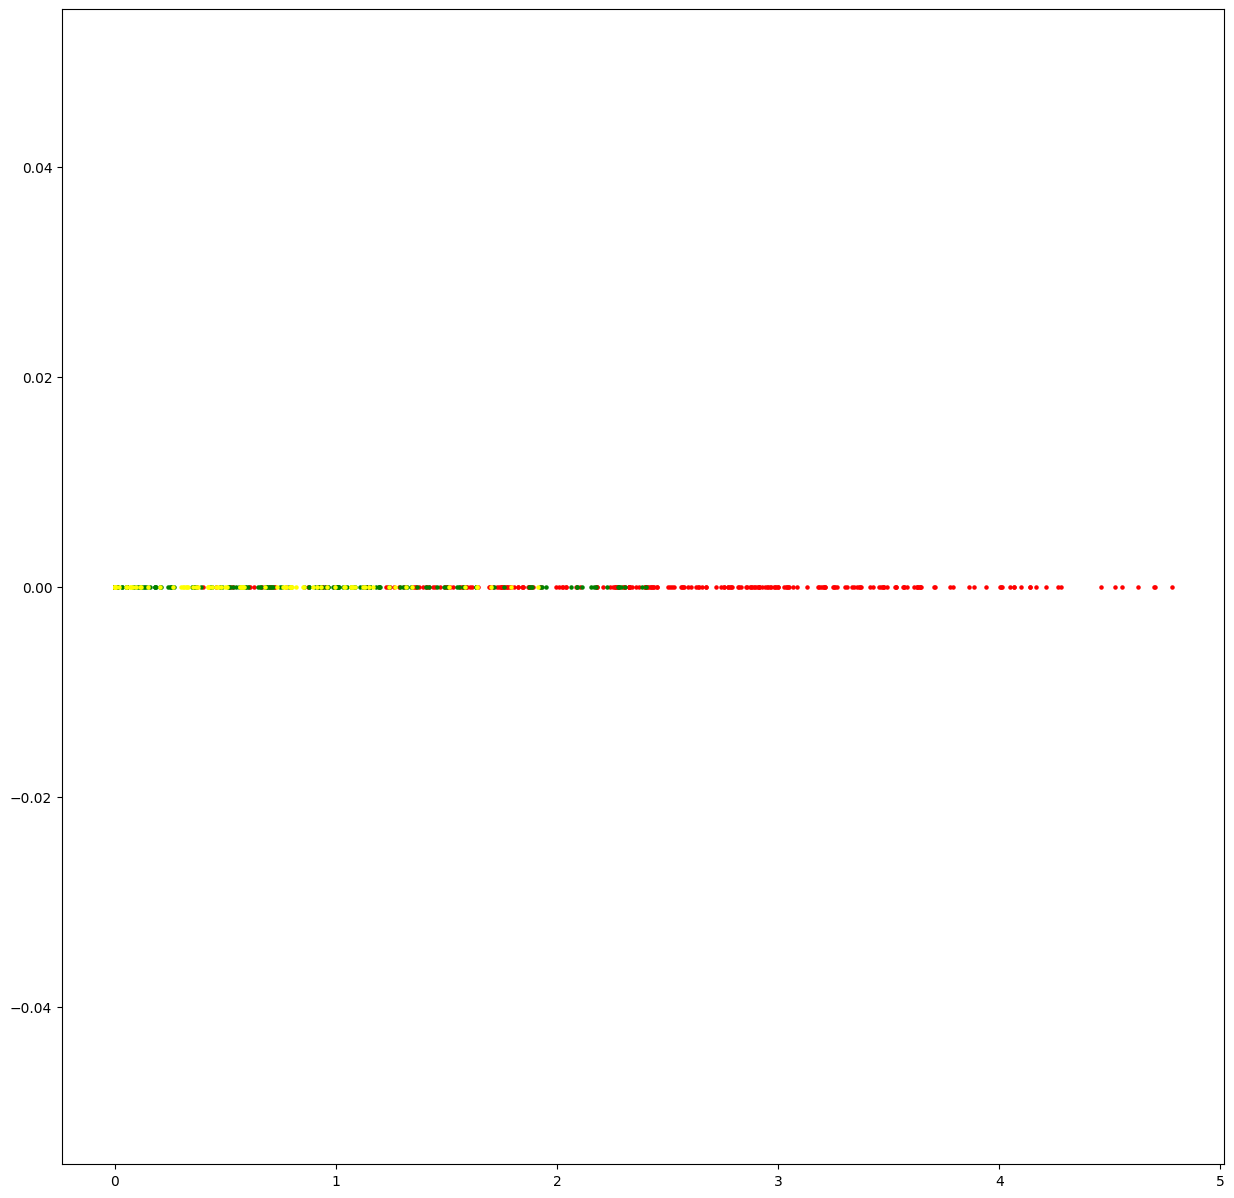

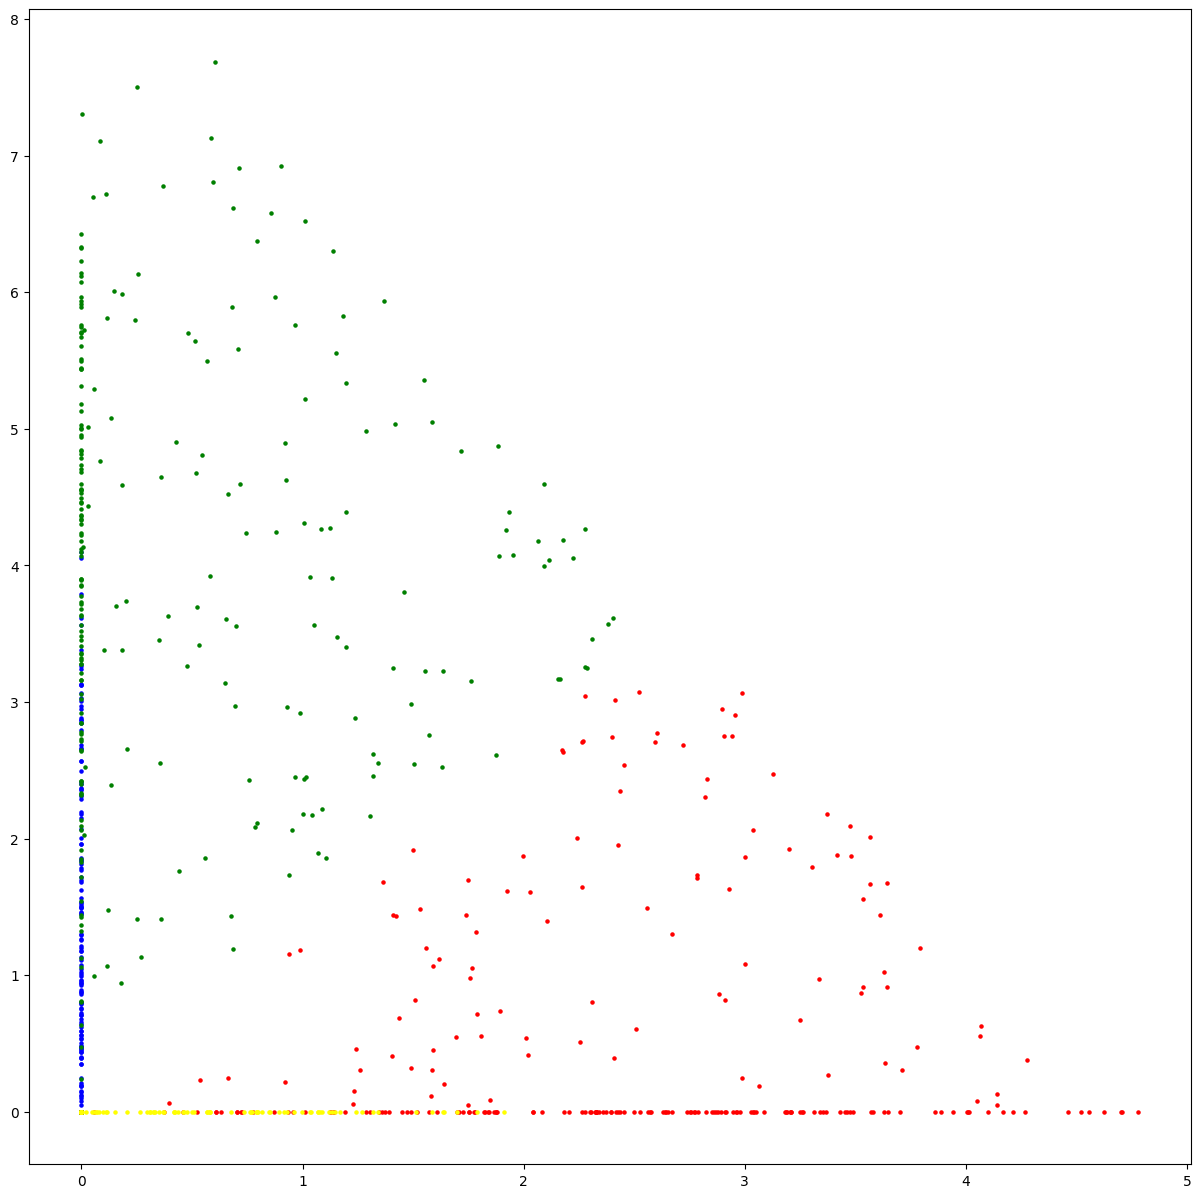

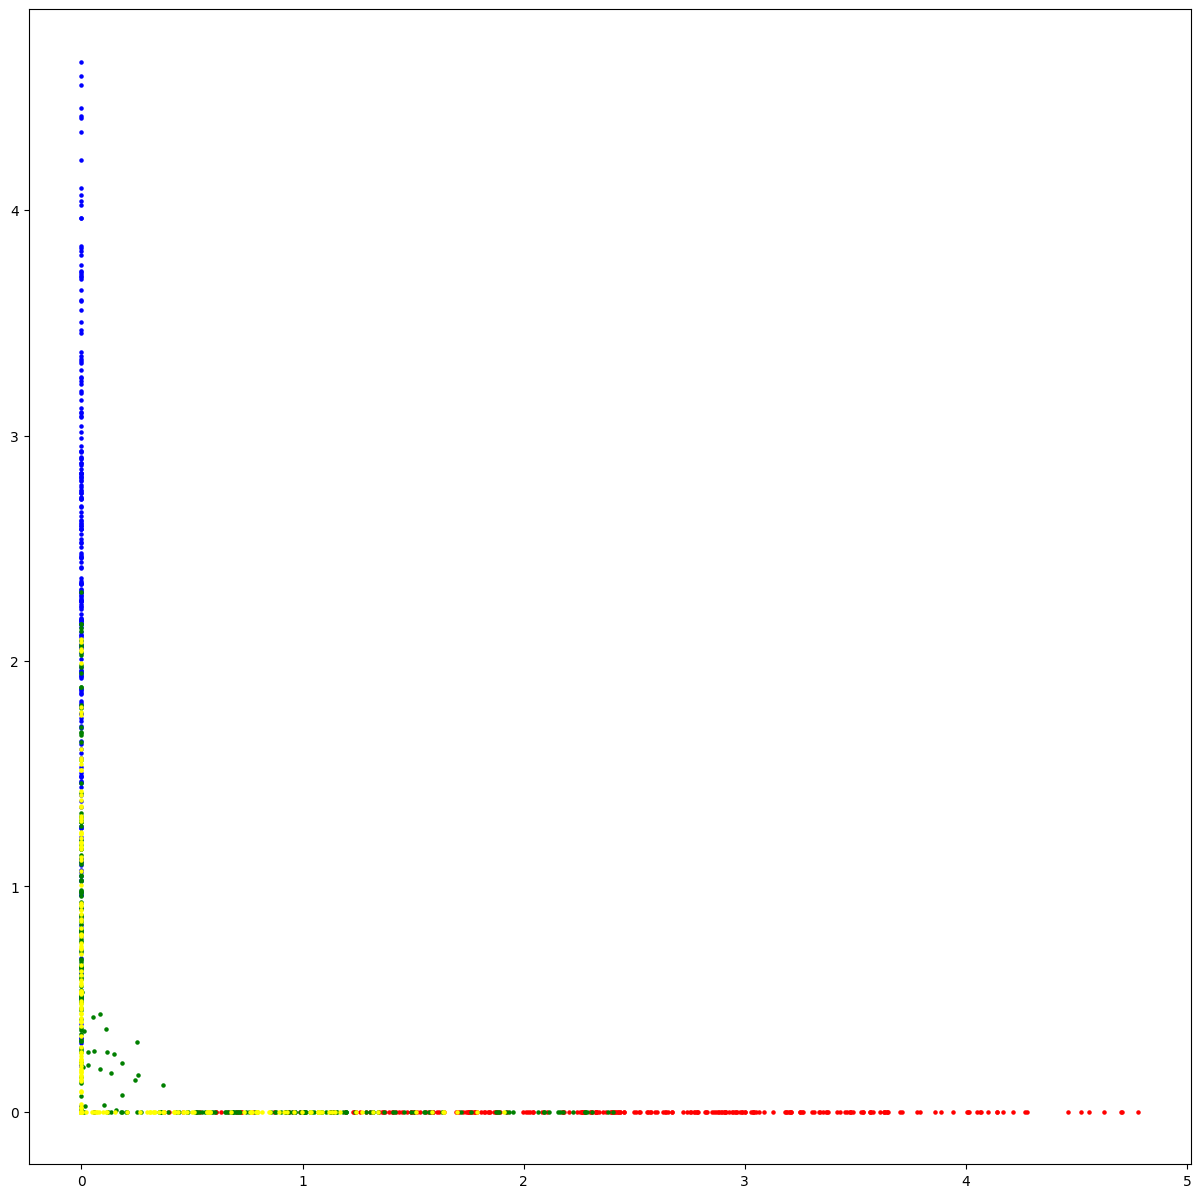

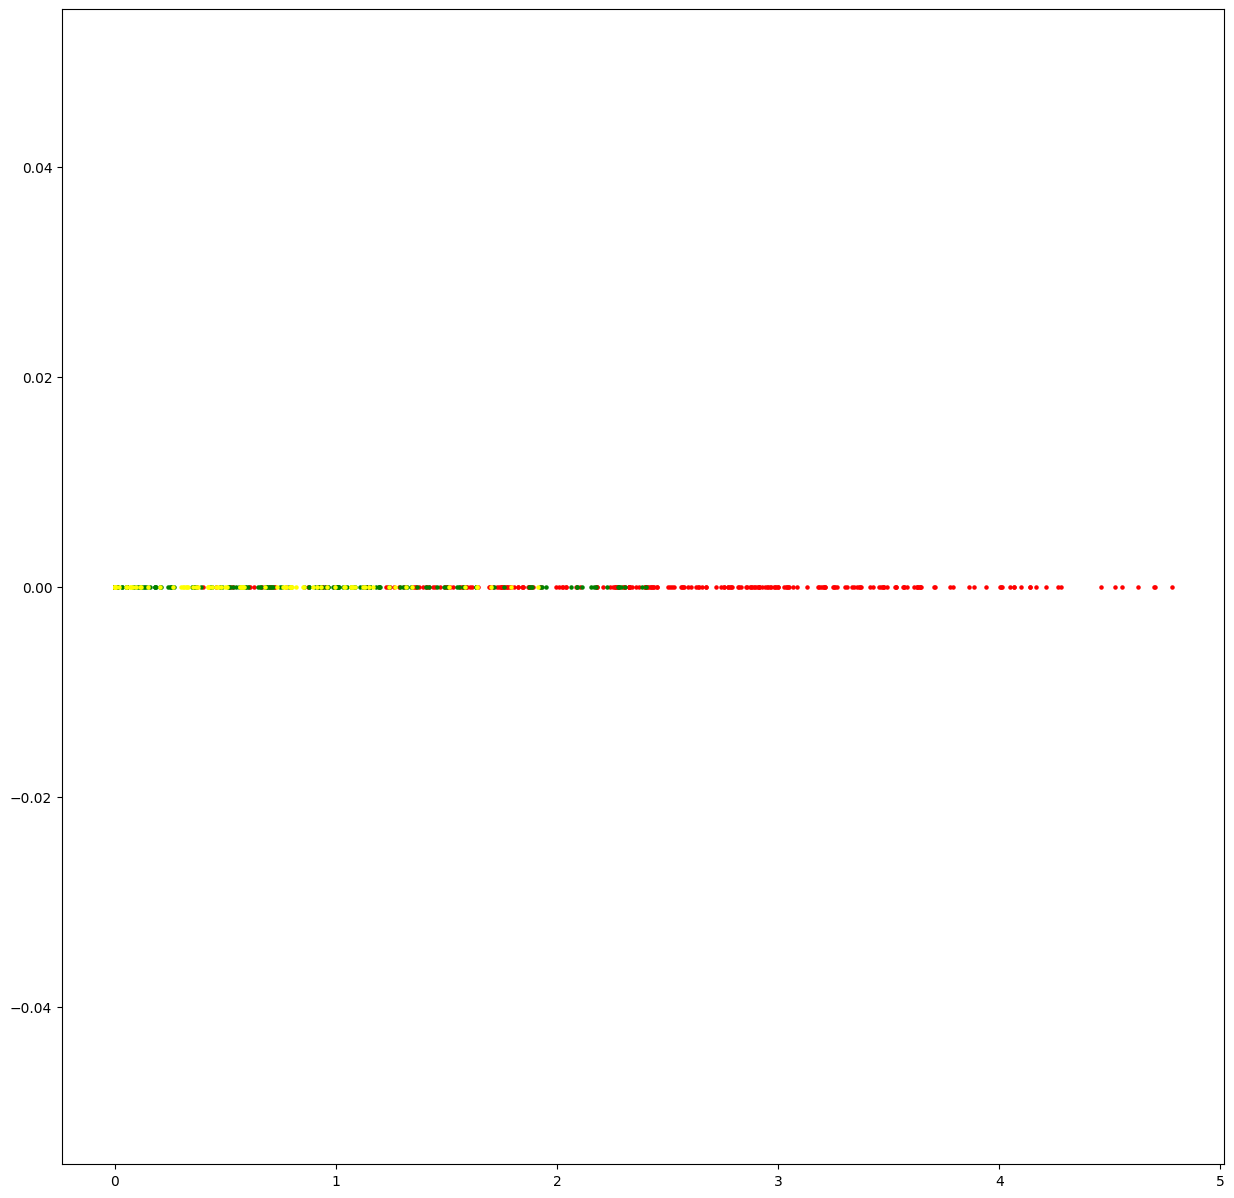

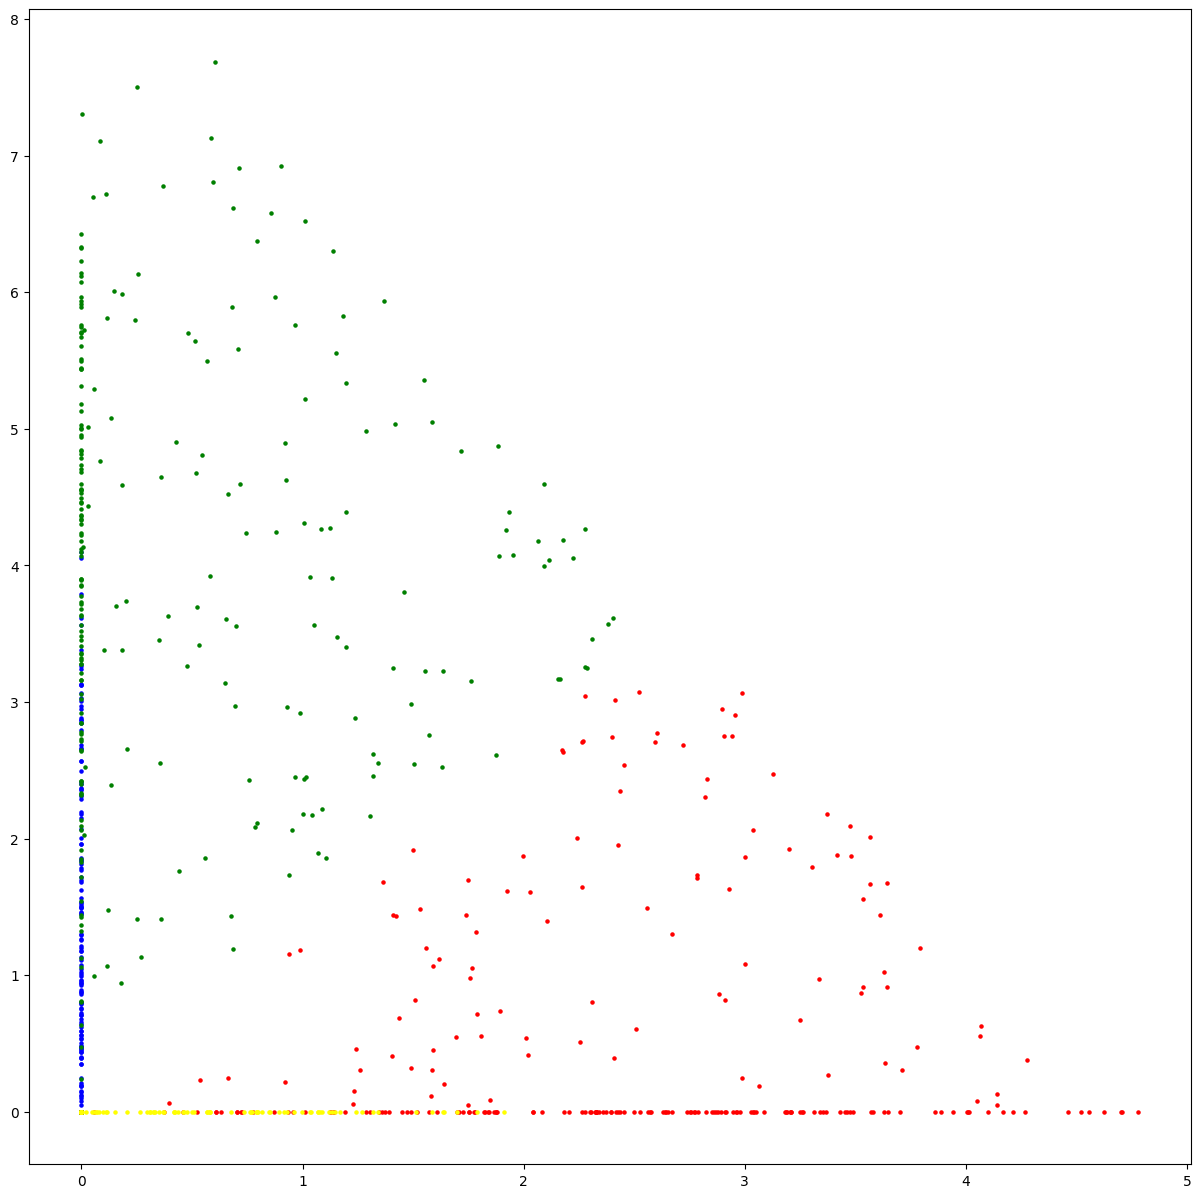

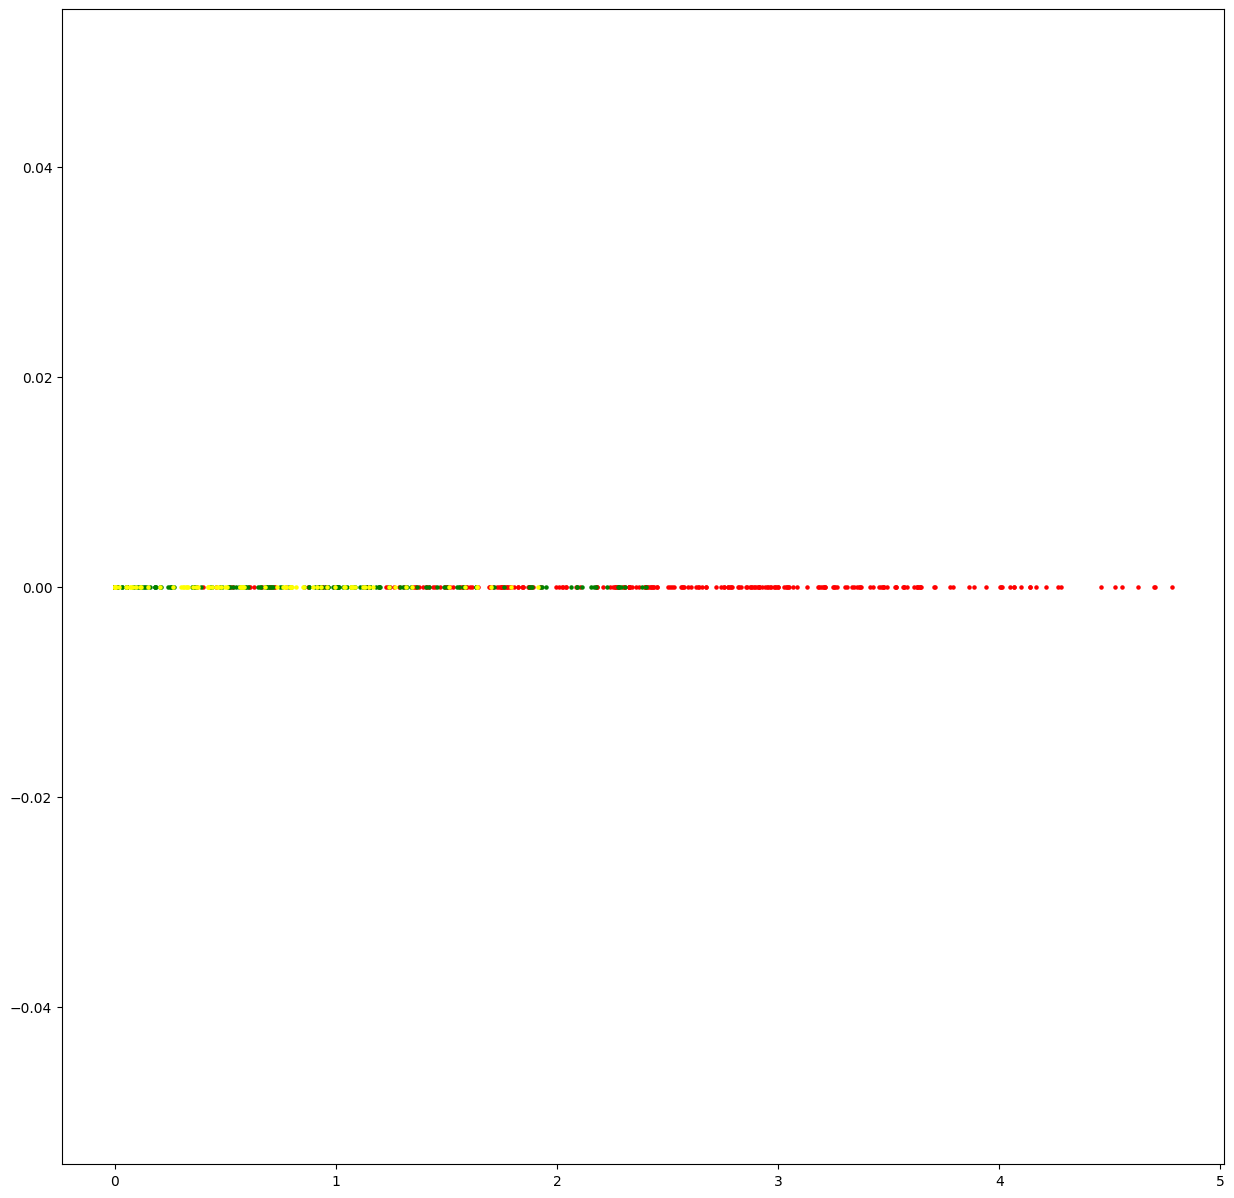

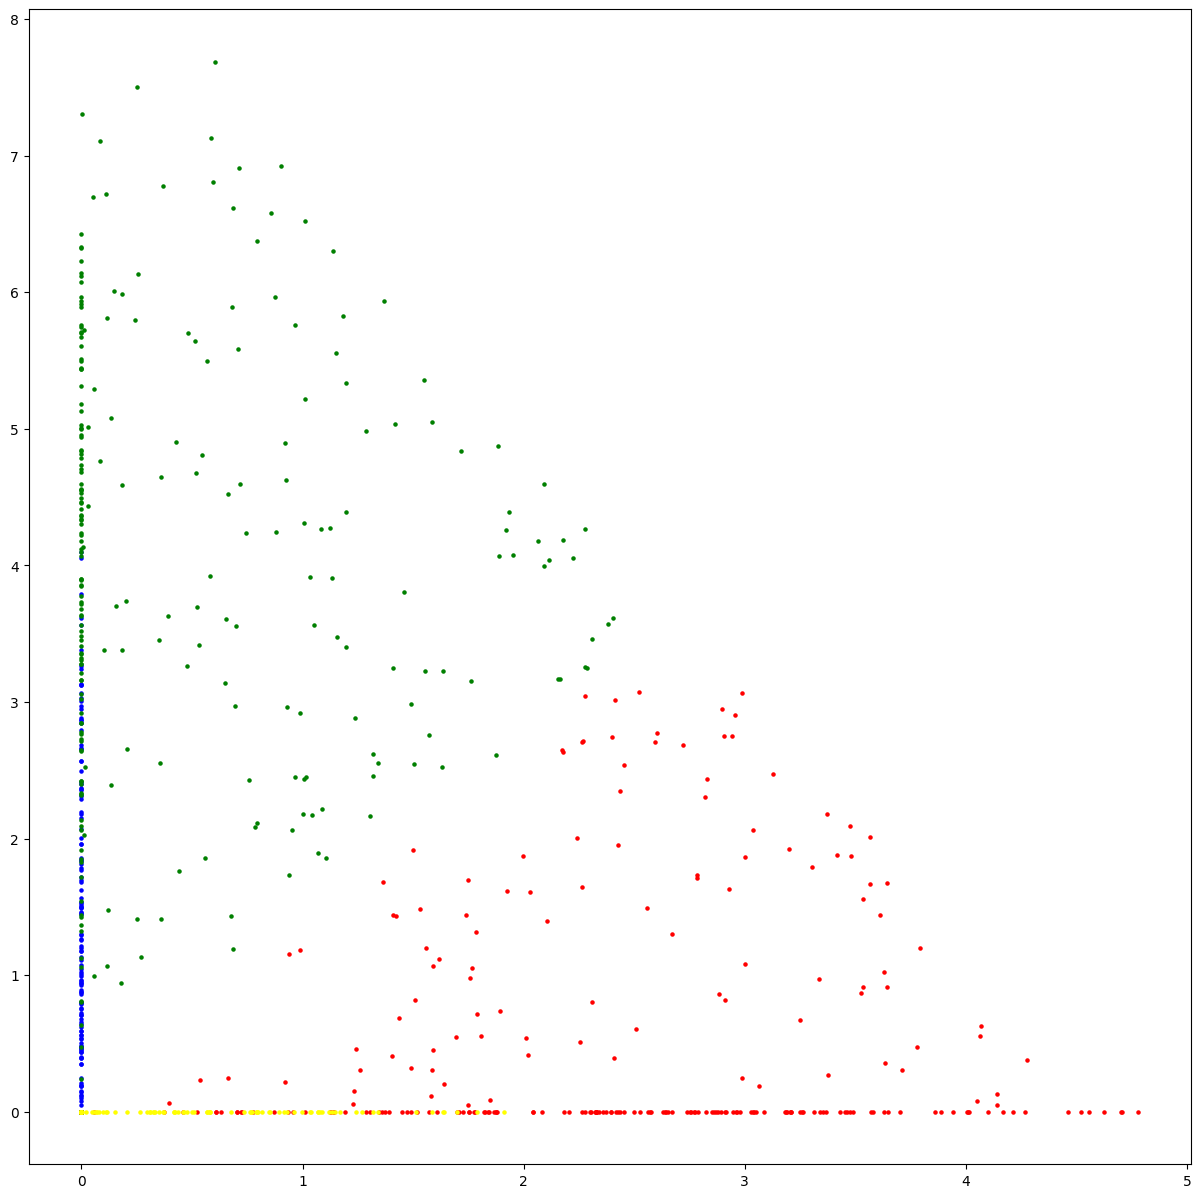

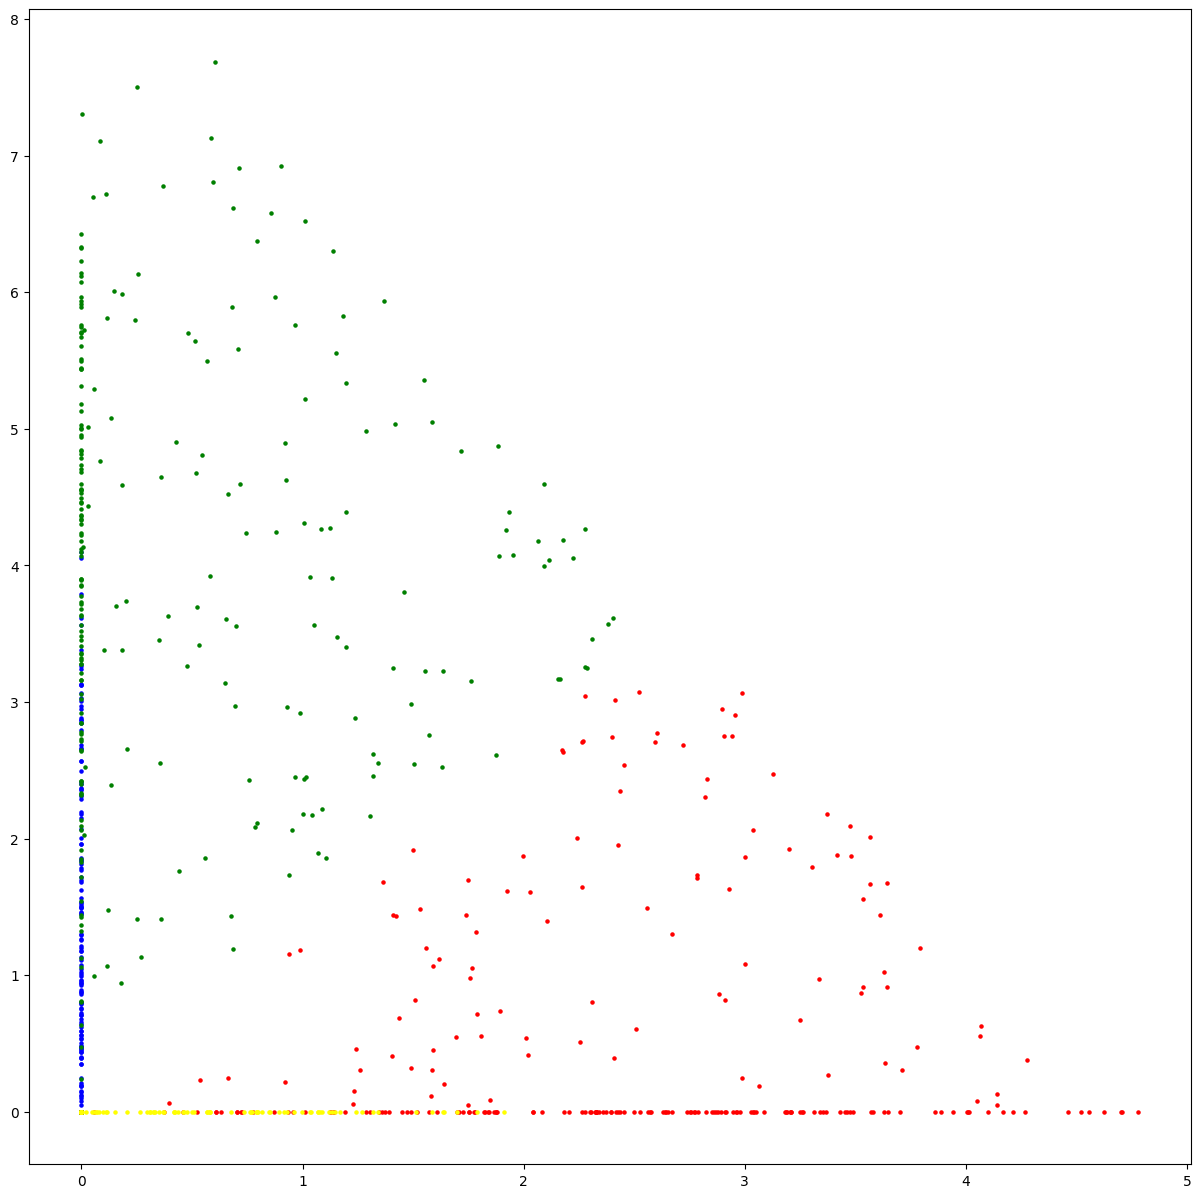

In [87]:
for i in range(number_of_hidden_units):
    for j in range(i + 1, number_of_hidden_units):
        plot_neuron(x, label, weight, bias, i, j)